In [1]:
import pandas as pd
import numpy as np

In [2]:
class CustomDataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target

In [3]:
def get_dataset(name='iris'):
    if name == 'iris':
        from sklearn.datasets import load_iris
        data = load_iris()
        return data
    if name == 'customer-amex':
        data = CustomDataset(
            pd.read_csv('../data/customer-amex/train_data.csv', nrows=1000),
            pd.read_csv('../data/customer-amex/train_labels.csv', nrows=1000)
        )
        return data

def get_tsne(X):
    from sklearn.manifold import TSNE
    X_embedded = TSNE(learning_rate='auto', init='random').fit_transform(X)
    return X_embedded

In [4]:
iris = get_dataset('iris')
X_iris = iris.data
Y_iris = iris.target

In [5]:
X_iris_embedded = get_tsne(X_iris)

In [6]:
def get_plot(X, Y):
    iris_embedded_combined = pd.DataFrame(data=np.c_[X, Y], columns=['x', 'y'] + ['target'])

    import seaborn as sbn
    sbn.scatterplot(data=iris_embedded_combined, x='x', y='y', hue='target')

In [7]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3).fit(X_iris)
clusters = clustering.labels_

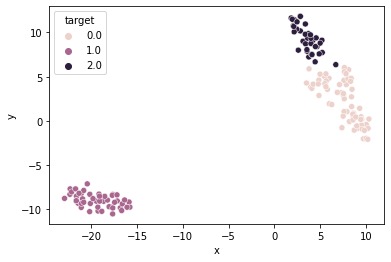

In [8]:
get_plot(X_iris_embedded, clusters)

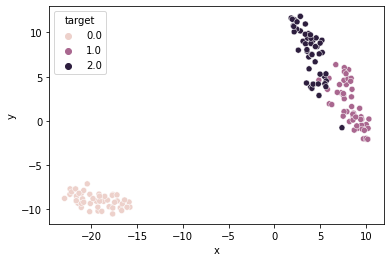

In [9]:
get_plot(X_iris_embedded, Y_iris)